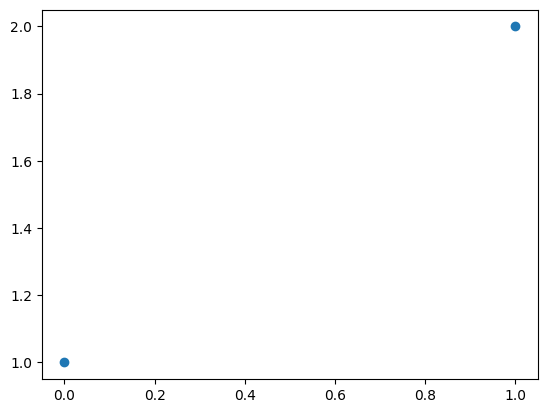

In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_forward
import seis_test
plt.scatter([0,1],[1,2])
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [2]:
importlib.reload(kgs)
data = kgs.Data()
data.seismogram.filename = 'F:\\seismic\\data\\train_samples\\FlatVel_A/data\\data1.npy'
data.seismogram.ind=5
data.velocity = kgs.Velocity()
data.velocity.filename = 'F:\\seismic\\data\\train_samples\\FlatVel_A/model\\model1.npy'
data.velocity.ind=5
data.check_constraints()
data.load_to_memory()
#data.unload()

In [3]:
importlib.reload(kgs)
data=kgs.load_all_train_data()
print(len(data))
for d in data:
    d.check_constraints()

10000


In [4]:
vals_not = []
vals_flat = []
from tqdm import tqdm
import cupy as cp
for d in tqdm(data):
    d.load_to_memory()
    kpi = cp.asnumpy(kgs.rms(d.seismogram.data[0,...] - cp.flip(d.seismogram.data[4,...],axis=1)))
    if 'FlatVel' in d.family:
        vals_flat.append(kpi)
    else:
        vals_not .append(kpi)
        if kpi<1e-5:
            plt.figure()
            plt.imshow(cp.asnumpy(d.velocity.data))
            plt.title(d.family+' '+str(kpi))
            plt.pause(0.001)
    d.unload()

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:41<00:00, 98.76it/s]


(2.9564978992879744e-06, 9.568541992996476e-06)

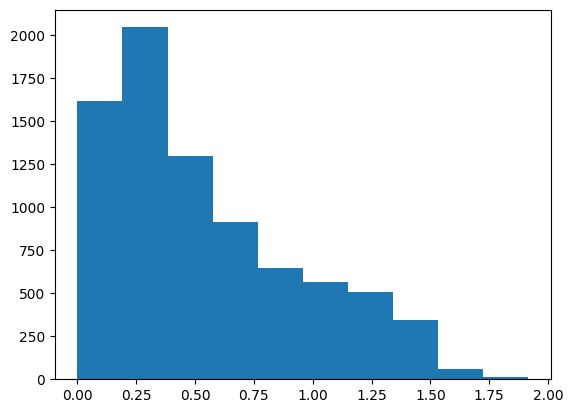

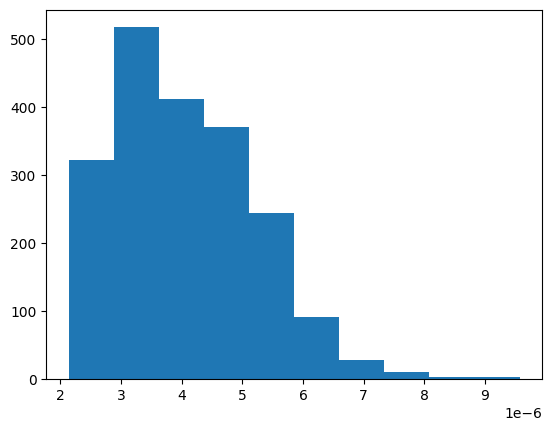

In [5]:
plt.figure()
plt.hist(vals_not)
plt.figure()
plt.hist(vals_flat)
np.min(vals_not), np.max(vals_flat)